University of Helsinki, Master's Programme in Data Science  
DATA20047 Probabilistic Cognitive Modelling - Spring 2025  
Luigi Acerbi  

# Problem Set 3: Cue combination and learning as inference

- This homework problem set focuses on **Week 5 and 6** of the course.
- This problem set is worth **25 points** in total (out of 100 for the full course).
- Check the submission deadline on Moodle!


## Submission instructions

Submission must be perfomed entirely on Moodle (**not** by email).
1. When you have completed the exercises, save the notebook.
2. Report your solutions and answers on Moodle ("*Problem set 3 answer return*").
3. Submit two files on Moodle ("*Problem set 3 notebook return*"): 
  - The notebook as `.ipynb`.
  - The same notebook downloaded as `.pdf`.

#### How to save the notebook as PDF

There are various ways to save the Jupyter notebook as PDF, depending on the version of Jupyter notebook you have.

- In older versions, you should be able to select "File" > "Print Preview" and then print the page to PDF using your browser (remember to enter the Print Preview first).
- In more recent versions, you can select "File" > "Save and Export Notebook As" > "PDF".
  * For this to work, you may need to install [Pandoc](https://pandoc.org/installing.html) first.
  * Compiling to PDF might take a while.

## IMPORTANT

1. Do not share your code and answers with others. Contrary to the class exercises, which you can do with others, these problems are *not* group work and must be done individually.
2. It is allowed to use snippets of code from the lecture exercises and model solutions.
3. It is your responsibility to ensure that the notebook has fully finished running all the cells, all the plots view properly etc. before submitting it. However, the notebook should be runnable from scratch if needed ("Kernel > Restart & Run All").
4. Submit your work by the deadline.
5. Unless stated otherwise, please report your numerical answers in Moodle with full numerical precision (~14-15 digits), unless the answer is an integer.
6. If you are confused, think there is a mistake or find things too difficult, please ask on Moodle.

## References

- \[**MKG23**\] Ma WJ, Körding K, and Goldreich D. "Bayesian Models of Perception and Action: An Introduction". MIT Press, 2023.
- \[**BVK10**\] Berniker M, Voss M, and Körding K. "Learning Priors for Bayesian Computations in the Nervous System". *PLoS One*, 2010. [Link](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0012686)


#### Acknowledgements

Thanks to Trevor Holland and Wei Ji Ma for sharing the audiovisual experiment data used in Question 3.1.

In [1]:
# set-up -- do not change
import numpy as np
import numpy.random as npr
import scipy as sp
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
npr.seed(1)

# Question 3.1 (6 pts)

#### Cue combination with priors

> This question extends the basic cue combination model to include prior beliefs, exploring a key concept from Week 5 on multisensory integration. We'll analyze how adding a prior affects both the posterior distribution and the estimate distribution in an audio-visual localization task. See Chapter 5 of [**MKG23**] and Week 5 lecture notes.

We consider here the standard model of cue combination modeling an audio-visual estimation experiment like the one seen in class and represented in Figure 5.1 of \[**MKG23**\]. All values are measured in degrees of visual angle.

- Differently from the cue combination cases we considered before, here we introduce a Gaussian prior, $p(s) = \mathcal{N}\left(s; \mu_s, \sigma_s^2 \right)$.
- For the rest, we assume the usual setup with two conditionally independent Gaussian measurements, $x_i \sim \mathcal{N}\left(x_i | s_i, \sigma_i^2\right)$ for $i = 1,2$ (with audio = 1 and visual = 2).
- As usual, we also postulate that the observer believes that $s_1 = s_2 = s$, so that their posterior is:
$$
p(s|x_1, x_2) \propto p(s) p(x_1|s) p(x_2|s).
$$
- We ignore motor noise (i.e, $r = \hat{s}$, or equivalently $\sigma_\text{motor} = 0$ deg). In other words, the estimate distribution is equivalent to the response distribution $p(\hat{s}|s_1, s_2) = p(r|s_1, s_2)$. *Note*: This is not relevant for part a, but only for part b of this exercise.

Throughout the exercise, we assume the following model parameters:
$$
\mu_s = 1 \text{ deg}, \; \sigma_s = 2 \text{ deg}, \quad \sigma_1 = 2 \text{ deg}, \; \sigma_2 = 3 \text{ deg}.
$$

#### Tasks
Calculate:
- a) The observer's posterior distribution $p(s|x_1,x_2)$ for measurements $x_1 = 3, x_2 = -1$ deg. Report the posterior mean $\mu_\text{post}$ and standard deviation $\sigma_\text{post}$ in Moodle.
- b) The observer's estimate distribution  $p(\hat{s}|s_1, s_2)$ for $s_1 = 6, s_2 = 0$ deg. Assume they use posterior mean estimate $\hat{s}_\text{PM} = \mu_\text{post}$ (as per the model described above). Report the estimate distribution mean $\mu_\text{est}$ and standard deviation $\sigma_\text{est}$ in Moodle.

#### Hints
- Be careful that in this case (non-flat prior), the variance of the estimate distribution $\sigma_\text{est}^2$ is *not* equal to the posterior variance $\sigma_\text{post}^2$.
- For this exercise, it might be convenient to use the precision representation from the book, using $J = \frac{1}{\sigma^2}$.
- You are asked to get to the results analytically, thus report your solutions up to numerical precision. For exercise (b), simulation results within $\pm 0.01$ from the correct solution will be accepted, but will only give half points. Numerical integration will not work for part (b).

In [2]:
print("part a)")

mu_s = 1
sigma_s = 2

sigma_1 = 2
sigma_2 = 3

x1 = 3
x2 = -1

J_s = 1 / sigma_s ** 2
J_1 = 1 / sigma_1 ** 2
J_2 = 1 / sigma_2 ** 2

J_tot = J_1 + J_2 + J_s

sigma_post = np.sqrt(1 / J_tot)
mu_post = sigma_post ** 2 * (J_s * mu_s + J_1 * x1 + J_2 * x2)

print(f"mu_post: {mu_post}")
print(f"sigma_post: {sigma_post}")

part a)
mu_post: 1.4545454545454546
sigma_post: 1.2792042981336627


In [3]:
print("part b)")

s1 = 6
s2 = 0

mu_est = (J_s * mu_s + J_1 * s1 + J_2 * s2) / J_tot
sigma_post = np.sqrt(
	sigma_1**2 * (J_1 / J_tot)**2 + sigma_2**2 * (J_2/J_tot)**2
)

print(f"mu_est: {mu_est}")
print(f"sigma_post: {sigma_post}")

part b)
mu_est: 2.8636363636363633
sigma_post: 0.9833321660356333


# Question 3.2 (6 pts)

#### Fitting cue combination models to real data

> This question applies our knowledge of cue combination models to fit real experimental data. We will work with preprocessed data from an audio-visual localization experiment where the visual stimulus has variable reliability. This problem builds on concepts from Weeks 4 and 5, including maximum likelihood estimation and model fitting. See Chapter 5.3 of [MKG23] and Week 5 lecture notes.

We consider here the `simplecue` model with the following properties:

- We assume an observer with a flat prior $p(s) = 1$ (i.e., "no prior").
- The measurement noise for the auditory stimulus is $p(x_1|s_1) = \mathcal{N}(x_1|s_1, \sigma_{1}^2)$, as usual. 
- In this experiment, there are *two* possible levels for the visual noise, *low* noise (`0`) and *high* noise (`1`). Experimentally, the visual stimulus is made "noisier" in a trial by blurring and/or reducing the contrast the stimulus. So, the measurement noise for the visual stimulus depends on the visual noise level in the trial, such that
  $$\mathcal{N}(x_2|s_2, \sigma_{2,\text{low}}^2)  \text{ if noise\_level is 0,} \qquad \text{and} \qquad \mathcal{N}(x_2|s_2, \sigma_{2,\text{high}}^2) \text{ if noise\_level is 1}.$$
- We assume that the observer is aware of the noise level in each trial.
- As usual in simple cue combination, the observer believes that $s_1 = s_2 = s$.
- The observer reports the posterior mean estimate $\hat{s}_\text{PM}$. We assume zero motor noise ($r = \hat{s}$ and $\sigma_\text{motor} = 0$).
- The model parameters are thus $\theta = \left(\sigma_1, \sigma_{2,\text{low}}, \sigma_{2,\text{high}} \right)$.

#### Dataset description

We analyze a dataset of audiovisual estimation data from a single subject.
The dataset consists of a table with four columns, where each row represents a trial of the experiment. The four columns are:
- `s1`: Auditory stimulus location (degrees).
- `s2`: Visual stimulus location (degrees).
- `noise_level`: Visual noise condition (0 = low, 1 = high).
- `r`: Observer's response (degrees).

#### Tasks
Calculate:
- a) The log-likelihood $\log \mathcal{L}(\theta_0)$ of the full dataset for model parameters: $\theta_0 = (\sigma_1 = 4°, \sigma_{2,\text{low}} = 6°, \sigma_{2,\text{high}} = 8°)$.
   - Report the result in Moodle.
- b) The maximum-likelihood estimate $\theta_\text{MLE}$ and corresponding log-likelihood, obtained by fitting the model above to the data: $\theta_\text{MLE} = \arg\max_\theta \log \mathcal{L}(\theta)$.
   - Report in Moodle the log-likelihood at the MLE solution.

#### Key equations
The log-likelihood for $N$ independent trials is:
$$\log \mathcal{L}(\theta) = \sum_{i=1}^N \log p(r_i|s_{1,i}, s_{2,i}, \text{noise\_level}_i; \theta).$$

#### Hints
- For part (a), expect: $-2050 < \log \mathcal{L}(\theta_0) < -2000$
- Remember that the response distribution is Gaussian. Both the mean and variance will depend on the stimuli and the noise level.

In [4]:
# Load data of audiovisual cue combination experiment from .csv file
df = pd.read_csv('https://raw.githubusercontent.com/lacerbi/prob-cog-mod-files/main/data/avcue_data.csv')
df = df.to_numpy()
s1 = df[:,0]
s2 = df[:,1]
noise_level = df[:,2].astype(int)
r = df[:,3]

In [5]:
sigma_1, sigma_2_low, sigma_2_high = 4., 6., 8.

def loglike(theta, data):
    sigma_1, sigma_2_low, sigma_2_high = theta
    s1 = data[:, 0]
    s2 = data[:, 1]
    noise_level = data[:, 2].astype(int)
    r = data[:, 3]
    
    sigma_2 = np.where(noise_level == 0, sigma_2_low, sigma_2_high)

    J_1 = 1 / (sigma_1 ** 2)
    J_2 = 1 / (sigma_2 ** 2)
    
    w1 = J_1 / (J_1 + J_2)
    w2 = J_2 / (J_1 + J_2)
    
    mu_est = w1 * s1 + w2 * s2
    
    var_est = w1 ** 2 * sigma_1 ** 2 + w2 ** 2 * sigma_2 ** 2
    
    return np.sum(-0.5 * np.log(2 * np.pi * var_est) - ((r - mu_est)**2) / (2 * var_est))

In [6]:
print("part a)")
print(f"value of log-likelihood for theta0: {loglike((sigma_1, sigma_2_low, sigma_2_high), np.column_stack((s1, s2, noise_level, r)))}")

part a)
value of log-likelihood for theta0: -2034.6551809030655


In [7]:
try: 
    from pybads.bads import BADS
    method = 'BADS'
except:
    method = 'L-BFGS-B'

In [8]:
np.set_printoptions(suppress=True)

In [9]:
print("part b)")
lower_bounds = np.array([0.001, 0.001, 0.001])
upper_bounds = np.array([40, 40, 40])

num_runs = 3

def multioptimize(target_fun,lower_bounds,upper_bounds,plausible_lower_bounds,plausible_upper_bounds,num_runs=3,method='L-BFGS-B'):
    """Simple function for multi-start optimization."""
    # Run num_runs optimization runs from different starting points    
    num_params = lower_bounds.shape[0]
    theta_res = np.zeros((num_runs,num_params))
    nll_res = np.zeros(num_runs)    
    
    for index in range(num_runs):
        if index == 0:
            theta0 = 0.5*(plausible_lower_bounds + plausible_upper_bounds)
        else:
            theta0 = np.random.uniform(low=plausible_lower_bounds,high=plausible_upper_bounds)
        
        if method == 'L-BFGS-B':
            bounds = sp.optimize.Bounds(lower_bounds,upper_bounds,True) # Set hard bounds
            res = sp.optimize.minimize(target_fun, theta0, method='L-BFGS-B', bounds=bounds)
            nll_res[index] = res.fun
            theta_res[index] = res.x
        elif method == 'BADS':
            bads = BADS(target_fun, theta0, lower_bounds, upper_bounds, plausible_lower_bounds, plausible_upper_bounds)
            res = bads.optimize()
            nll_res[index] = res.fval
            theta_res[index] = res.x
        else:
            error('Unknown optimization method.')
        print('Run {}: log-likelihood {}'.format(index, -nll_res[index]))
        
    # Pick the best solution
    idx_best = np.argmin(nll_res)
    nll_best = nll_res[idx_best]
    theta_best = theta_res[idx_best]        
    return nll_best,theta_best

target_fun = lambda theta_: -loglike(theta_, np.column_stack((s1, s2, noise_level, r)))

nll_best,theta_best = multioptimize(
	target_fun
	,lower_bounds
	,upper_bounds
	,lower_bounds
	,upper_bounds
	,num_runs
	,method=method
)

print(f"The maximum-likelihood solution is theta_ML = {theta_best} with log-likelihood: {-nll_best}")

part b)
Run 0: log-likelihood -1604.149548785196
Run 1: log-likelihood -1604.1495487557386
Run 2: log-likelihood -1604.1495487483655
The maximum-likelihood solution is theta_ML = [9.23123038 4.63300733 6.78173687] with log-likelihood: -1604.1495487483655


In [10]:
np.set_printoptions(suppress=False)

# Question 3.3 (6 pts)

#### Learning probabilities from noisy measurements

> This question explores how a Bayesian observer learns the probability of binary events through sequential noisy observations. We will analyze a perceptual decision-making task inspired by real neuroscience experiments performed by humans and animals. See Week 6 lecture notes on learning and adaptation.

We consider here the following decision-making task:

- In each trial of the task, the observer needs to press an arrow key depending on whether they are shown a left-tilted or a right-tilted grating on a screen.
- In each trial $i$, the grating orientation $s_i$ is either -1 (left) or 1 (right), with $p(s_i = 1|\pi_\text{R}) = \pi_\text{R}$ and $p(s_i = -1|\pi_\text{R}) = 1 - \pi_\text{R}$, where $\pi_\text{R} \in (0, 1)$ is the probability of the grating being right-tilted.
- The observer only sees a noisy measurement of orientation $x_i$, with $p(x_i|s_i) = \mathcal{N}\left(x_i|s_i,\sigma^2\right)$. In this exercise, we assume $\sigma = 1$.
- Assume the observer starts with a flat prior over $\pi_\text{R}$, that is $p(\pi_\text{R}) = 1$ for $\pi_\text{R} \in (0, 1)$.

#### Task

Compute numerically the posterior $p(\pi_\text{R}|\textbf{x}_\text{obs})$ that the Bayesian observer would have after having observed the full sequence of noisy measurements $\textbf{x}_\text{obs} = \left(x_1, \ldots, x_T\right)$ provided below (assuming no feedback is given to the subject). 

Report in Moodle the mean and standard deviation of the posterior over $\pi_\text{R}$ at the end of the last trial $T$.

#### Key equations

The posterior can be computed recursively: given the posterior $ p(\pi_\text{R}| x_1,\ldots, x_{t-1})$ at the end of the previous trial $t-1$ (where $t = 0$ is the prior), you can compute the posterior at trial $t$ as
$$
p(\pi_\text{R} | x_1, \ldots, x_t) \propto p(\pi_\text{R}| x_1,\ldots, x_{t-1}) \left[ p(x_{t}| s_t = 1) p(s_{t} = 1|\pi_\text{R}) + p(x_{t}| s_t = -1) p(s_{t} = -1|\pi_\text{R})\right],
$$
where all the terms are defined above. This equation allows numerical computation of the posterior.

#### Notes 
- This task is inspired by experiments from the [International Brain Laboratory](https://www.internationalbrainlab.com/#home) studying decision-making in mice. Key findings show that, after training, mice adapt their responses according to changes of $\pi_\text{R}$ across experimental blocks. A key question is how the probability $\pi_\text{R}$ is represented in the mouse brain (if explicitly represented at all). For more details, see [The IBL et al. (2021)](https://elifesciences.org/articles/63711) and [Findling et al. (2023)](https://www.biorxiv.org/content/10.1101/2023.07.04.547684v5.abstract).
- When analyzing real data we would not have access to $\mathbf{x}_\text{obs}$, and we would need to marginalize over it given the (known to us) sequence of stimuli, but this is not required in this exercise.

In [11]:
x_obs = np.array([ 0.82757179,  0.12214158,  1.04221375,  1.58281521, -0.10061918,
        2.14472371,  1.90159072,  1.50249434,  1.90085595,  0.31627214,
        0.87710977,  0.06423057,  0.73211192, -0.46964453,  0.30833925,
        0.60324647,  0.3128273 ,  0.15479436,  0.32875387,  0.9873354 ,
       -2.11731035, -0.7655843 ,  2.65980218,  1.74204416, -1.19183555,
       -1.88762896,  0.25284171,  2.6924546 ,  1.05080775, -1.63699565])

In [12]:
sigma = 1.0
mu_left = -1.0
mu_right = 1.0

N_pi = 2**10+1
lower_bound = 0
upper_bound = 1
pi_grid = np.linspace(lower_bound, upper_bound, N_pi)
dpi = pi_grid.flatten()[1] - pi_grid.flatten()[0]

likelihoods_array_right = sps.norm.pdf(x_obs, mu_right, sigma)
likelihoods_array_left = sps.norm.pdf(x_obs, mu_left, sigma)

likelihood_pdf = pi_grid.reshape(-1, 1) * likelihoods_array_right.reshape(1, -1) + (1 - pi_grid).reshape(-1, 1) * likelihoods_array_left.reshape(1, -1)

posterior_pdf = np.exp(np.sum(np.log(likelihood_pdf) ,axis = 1))
posterior_pdf /= sp.integrate.romb(posterior_pdf, dx = dpi)

mu_post = sp.integrate.romb(pi_grid * posterior_pdf, dx = dpi)
var_post = sp.integrate.romb((pi_grid - mu_post)**2 * posterior_pdf, dx = dpi)

print(f"mu_post: {mu_post}")
print(f"sigma_post:  {np.sqrt( var_post )}")

mu_post: 0.7665041801922547
sigma_post:  0.09999004769657394


# Question 3.4 (7 pts)

#### Learning Gaussian priors from experience

> This question explores how observers might learn the parameters of a Gaussian prior through repeated exposure to stimuli. We will analyze how beliefs about both the mean and standard deviation of the stimulus distribution evolve over time. This builds on concepts from Week 6 about learning and adaptation. See Chapter 6 of [**MKG23**] and the discussion of the "coin catching" task in [**BVK10**].

We assume that the observer is simultaneously learning both the mean $\mu_s$ and the standard deviation $\sigma_s$ of the prior. We denote with $q_s(s)$ the observer's prior (as opposed to the true experimental distribution of stimuli, $p_s(s)$).

For example, we could consider the "coin catching" task of \[**BVK10**\] described in Week 6 and Exercise 6.2, but the details do not particularly matter. What matters is that in each trial the observer sees stimulus $s \sim p(s) = \mathcal{N}\left(s| \mu_s, \sigma_s^2\right)$ (we ignore measurement noise). We assume the observer learns the parameters of the distribution $p_s(s)$ over multiple trials.

Assume that the observer starts with a factorized prior over $\mu_s$ and $\sigma_s$:
$$
p(\mu_s, \sigma_s) = p(\mu_s) p(\sigma_s) = \mathcal{N}\left(\mu_s; 0, \tau^2 \right) \frac{1}{\tau} \exp\left[-\frac{\sigma_s}{\tau} \right] \qquad \text{ for } \; \sigma_s > 0,
$$
where $\tau = 0.1$.

Consider the sequence of stimuli $\textbf{s} = (s_1, \ldots, s_T)$ provided below and let's analyze what the observer would learn.

### Tasks

Compute the posterior $p(\mu_s, \sigma_s| s_1, \ldots, s_t)$, with the simplifying assumption that the observer has direct access to $s_i$ at the end of each trial. Compute the posterior mean of the observer's prior mean $\hat{\mu_s}_{PM}$ and the posterior mean of the observer's prior standard deviation $\hat{\sigma_s}_{PM}$ as a function of trial $t$, where $t = 0$ is before the start of the experiment (prior), $t = 1$ is the end of the first trial, and so on up to $t = T$.

- a) Report in Moodle the posterior means of the observer's prior parameters, $\hat{\mu_s}_\text{PM}$ and $\hat{\sigma_s}_\text{PM}$, after the $T$ observations.
- b) Plot the posterior mean $\hat{\mu_s}_\text{PM}$ and $\hat{\sigma_s}_\text{PM}$ as a function of $t = 0, \ldots, T$. You should see that that $\hat{\mu_s}_\text{PM}$ increases with time, while $\hat{\sigma_s}_\text{PM}$ has an initial spike upwards, and then decreases over time. Can you explain why? Write your answer below and report it in Moodle (max 200 words).

#### Key equations
For computing marginal posteriors:
$$p(\mu_s|\mathbf{s}) = \int p(\mu_s,\sigma_s|\mathbf{s})d\sigma_s, \quad p(\sigma_s|\mathbf{s}) = \int p(\mu_s,\sigma_s|\mathbf{s})d\mu_s$$
These equations are useful to  compute the posterior mean of $\mu_s$ and $\sigma_s$.

*Hints*:
- For part (a), you will need a 2-D grid to keep track of the posterior over $\mu_s$ and $\sigma_s$ across iterations.
- Since $\sigma_s > 0$, start the grid for $\sigma_s$ at a small nonzero value (e.g., `1e-8`).
- For part (b), first of all look at the distribution of stimuli (i.e., mean and standard deviation of $\mathbf{s}$). How does the distribution of stimuli relate to the prior? What happens over time as more stimuli are seen?

### Answer

The initial spike of the parameter $\hat{\sigma_s}_\text{PM}$ occurs because the model is trying to account for the higher then expected variability coming from the data compared to the initial guess. As more data is processed the parameter stabilizes until convergence. If we increase the value of $\tau$ or rearrange the dataset so that the first values are closer to the inital guess this behavior is not present. 

On the other hand the parameter $\hat{\mu_s}_\text{PM}$ does not display a spike behavior because the data is closer to the inital preditiction at first but over time the value increases to a much larger value then predicted. Again, by rearranging the initial dataset we can again observe a spike behavior from the mean parameter but still the true value is larger and the tendency does not vary (the mean keeps increasing to converge to a large value). Increasing the value of the $\tau$ parameter by small amounts also makes the $\hat{\mu_s}_\text{PM}$ parameter spike.

In [13]:
s_t = np.array([ 0.4936518 ,  0.15823654,  0.17077424,  0.08905471,  0.37981114,
       -0.0952308 ,  0.51172176,  0.13581896,  0.29785586,  0.21259444,
        0.46931619, -0.05902111,  0.20163742,  0.19239185,  0.42006542,
        0.08501631,  0.22413577,  0.11832124,  0.25633206,  0.33742228,
        0.08490712,  0.42170856,  0.38523861,  0.32537415,  0.38512839,
        0.14744082,  0.23156647,  0.10963458,  0.20981679,  0.32955332,
        0.14625089,  0.19048697,  0.14692409,  0.12321915,  0.14931308,
        0.24810031,  0.08240345,  0.28516235,  0.49897033,  0.36130662,
        0.22122467,  0.11685566,  0.13792626,  0.50386819,  0.25762116,
        0.15445065,  0.27863732,  0.56503827,  0.26802384,  0.34258047,
        0.29502555,  0.19716252,  0.07862227,  0.19759859,  0.21866586,
        0.33799348,  0.37584751,  0.38966531,  0.2928381 ,  0.38277117,
        0.13684031,  0.43793022,  0.32693947,  0.20528607,  0.32327772,
        0.23866424,  0.41974441,  0.47797252,  0.57783631,  0.04052555,
        0.03338293,  0.17433012,  0.27400556,  0.38142534,  0.29734524,
       -0.05333018,  0.2040694 ,  0.3741962 ,  0.28451421,  0.36430168,
        0.21665078,  0.21988629,  0.27798421,  0.31150775,  0.27974496,
        0.2678513 ,  0.14940066,  0.30663457,  0.26827319,  0.41942259,
        0.42983768,  0.27777346,  0.19370726,  0.15419044,  0.31352415,
        0.26160101,  0.19842195,  0.25653953,  0.15699987,  0.35470481])

T = s_t.shape[0]

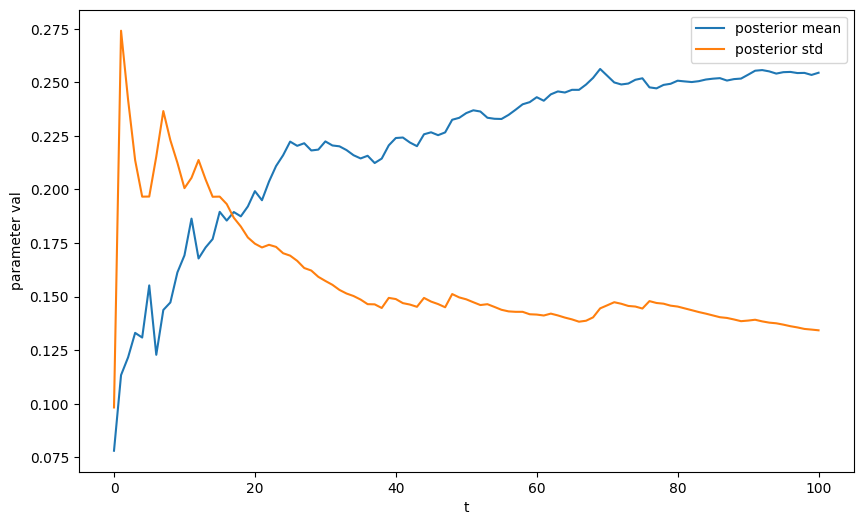

mu_post: 0.2544764224622324
sigma_post: 0.13429039583122415


In [14]:
tau = 0.1

Nm = Ns = 300
lower_mu_s, upper_mu_s = (-1.0) * 1e-3, 1.0
lower_sigma_s, upper_sigma_s = (1.0) * 1e-8, 1.0

mu_s_row = np.linspace(lower_mu_s, upper_mu_s, Nm)
sigma_s_row = np.linspace(lower_sigma_s, upper_sigma_s, Ns)
dmu_s = mu_s_row.flatten()[1] - mu_s_row.flatten()[0]
dsigma_s = sigma_s_row.flatten()[1] - sigma_s_row.flatten()[0]

mu_s_grid = np.outer(np.ones(Nm), mu_s_row)
sigma_s_grid = np.outer(sigma_s_row, np.ones(Ns))

posterior_pdf = sps.norm.pdf(mu_s_grid, 0, tau) * (1/tau) * np.exp( -sigma_s_grid/tau )
posterior_pdf /= np.sum(posterior_pdf) * dmu_s * dsigma_s # normalization

mu_post_list = [np.sum(mu_s_grid * posterior_pdf) * dmu_s * dsigma_s]
sigma_post_list = [np.sum(sigma_s_grid * posterior_pdf) * dmu_s * dsigma_s]

for s in s_t:
	posterior_pdf *= sps.norm.pdf(s, mu_s_grid, sigma_s_grid)
	posterior_pdf /= np.sum(posterior_pdf) * dmu_s * dsigma_s  # normalization
	mu_post_list.append(np.sum(mu_s_grid * posterior_pdf) * dmu_s * dsigma_s)
	sigma_post_list.append(np.sum(sigma_s_grid * posterior_pdf) * dmu_s * dsigma_s)

plt.figure(figsize=(10,6))
plt.plot(range(T+1), mu_post_list, label='posterior mean')
plt.plot(range(T+1), sigma_post_list, label='posterior std')
plt.xlabel('t')
plt.ylabel('parameter val')
plt.legend()
plt.show()

print(f"mu_post: {mu_post_list[-1]}")
print(f"sigma_post: {sigma_post_list[-1]}")